In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [235]:
import math

print(math.frexp(0.5))
print(math.frexp(1.0))
print(math.frexp(5.0))
print(math.frexp(10e10))
print(math.frexp(10e-10))

(0.5, 0)
(0.5, 1)
(0.625, 3)
(0.7275957614183426, 37)
(0.536870912, -29)


In [244]:
import struct as st

fpack = st.pack('f',1/4) # Convierto a float el numero que quiero
fint = st.unpack('i',fpack)[0] # Convierto a int
print(bin(fint)[-23:][0:4]) # Los ultimos 23 bits son la mantisa, me quedo con los 4 mas significativos

fpack1 = st.pack('f',4/5) # Convierto a float el numero que quiero
fint1 = st.unpack('i',fpack1)[0] # Convierto a int
print(bin(fint1)[-23:][0:4]) # Los ultimos 23 bits son la mantisa, me quedo con los 4 mas significativos

fpack2 = st.pack('f',5/8) # Convierto a float el numero que quiero
fint2 = st.unpack('i',fpack2)[0] # Convierto a int
print(bin(fint2)[-23:][0:4]) # Los ultimos 23 bits son la mantisa, me quedo con los 4 mas significativos

fpack3 = st.pack('f',3/7) # Convierto a float el numero que quiero
fint3 = st.unpack('i',fpack3)[0] # Convierto a int
print(bin(fint3)[-23:][0:4]) # Los ultimos 23 bits son la mantisa, me quedo con los 4 mas significativos

0000
1001
0100
1011


In [245]:
print(np.finfo(float).eps)

2.22044604925e-16


In [246]:
import struct as st

fpack = st.pack('d',10.0) # Convierto a float el numero que quiero
fint = st.unpack('q',fpack)[0] # Convierto a int
print(bin(fint)[-23:]) # Los ultimos 23 bits son la mantisa

fpack1 = st.pack('d',1.0) # Convierto a float el numero que quiero
fint1 = st.unpack('q',fpack1)[0] # Convierto a int
print(bin(fint1)[-23:]) # Los ultimos 23 bits son la mantisa

fpack2 = st.pack('d',0.1) # Convierto a float el numero que quiero
fint2 = st.unpack('q',fpack2)[0] # Convierto a int
print(bin(fint2)[-23:]) # Los ultimos 23 bits son la mantisa

fpack3 = st.pack('d',6e-8) # Convierto a float el numero que quiero
fint3 = st.unpack('q',fpack3)[0] # Convierto a int
print(bin(fint3)[-23:]) # Los ultimos 23 bits son la mantisa"

00000000000000000000000
00000000000000000000000
00110011001100110011010
01001000110100100101011


In [247]:
def circunferencia_aproximada(n):
    return (2*n)*np.sin(np.pi/n) #aproximo la circunferencia del circulo por el perimetro de un poligono de n lados, mayor n mejor la aprox.
    
# Uso la formula del area del circulo A = Pi * (C/2Pi)^2, con C la aproximacion de arriba\n",
sup4 = np.pi*(circunferencia_aproximada(4)/(2*np.pi))**2
sup8 = np.pi*(circunferencia_aproximada(8)/(2*np.pi))**2
sup16 = np.pi*(circunferencia_aproximada(16)/(2*np.pi))**2
sup32 = np.pi*(circunferencia_aproximada(32)/(2*np.pi))**2
sup64 = np.pi*(circunferencia_aproximada(64)/(2*np.pi))**2
sup128 = np.pi*(circunferencia_aproximada(128)/(2*np.pi))**2

print(sup4, sup8, sup16, sup32, sup64, sup128)

err4 = np.pi - sup4
err8 = np.pi - sup8
err16 = np.pi - sup16
err32 = np.pi - sup32
err64 = np.pi - sup64
err128 = np.pi - sup128
    
print(err4, err8, err16, err32, err64, err128)

2.54647908947 2.98338582862 3.10142685985 3.13151242645 3.13907016687 3.14096187994
0.595113564119 0.158206824965 0.0401657937384 0.0100802271444 0.00252248672008 0.000630773648944


In [248]:
import struct as st

def tobits(f):
    fpack = st.pack('d',f) # Convierto a float el numero que quiero
    fint = st.unpack('q',fpack)[0] # Convierto a int
    print(bin(fint))

tobits(10.0)
tobits(1.0)
tobits(0.1)
tobits(6e-8)

0b100000000100100000000000000000000000000000000000000000000000000
0b11111111110000000000000000000000000000000000000000000000000000
0b11111110111001100110011001100110011001100110011001100110011010
0b11111001110000000110110010101100101001101001000110100100101011


In [232]:
# Asumo raices reales

def roots(a,b,c):
    delta = b**2 - 4*a*c
    
    x1 = (2*c) / (-b-np.sqrt(delta))
    x2 = (-b-np.sqrt(delta)) / (2*a)
     
    return x1, x2

print(roots(3.0e-3,-2.0,1e-4))
print(roots(1.2e-17,5.5,1e-13))
print(roots(1.2e-17,5.5,1e-15))

(666.66661693418007, 5.0000003729936772e-05)
(-1.8181818181818181e-14, -4.5833333333333338e+17)
(-1.8181818181818182e-16, -4.5833333333333338e+17)


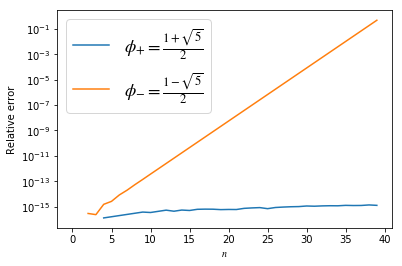

In [64]:
N = 40

ymas, ymenos = np.empty(N), np.empty(N)
err_mas, err_menos = np.empty(N), np.empty(N)

ymas[0], ymenos[0] = 1, 1
ymas[1] = ((1 + np.sqrt(5))/2)
ymenos[1] = ((1 - np.sqrt(5))/2)

err_mas[0], err_menos[0] = 0, 0
err_mas[1], err_menos[1] = 0, 0

for n in range(1,N-1):
    ymas[n+1] = ymas[n] + ymas[n-1]
    err_mas[n+1] = np.abs(ymas[n+1] - ymas[1]**(n+1))/np.abs(ymas[1]**(n+1))
    ymenos[n+1] = ymenos[n] + ymenos[n-1]
    err_menos[n+1] = np.abs(ymenos[n+1] - ymenos[1]**(n+1))/np.abs(ymenos[1]**(n+1))
    
n = [i for i in range(N)]
    
plt.figure(1)
plt.semilogy(n,err_mas, label=r'$\phi_{+} = \frac{1 + \sqrt{5}}{2}$')
plt.semilogy(n,err_menos, label=r'$\phi_{-} = \frac{1 - \sqrt{5}}{2}$')
plt.xlabel(r'$n$')
plt.ylabel('Relative error')
plt.xticks()
plt.yticks()
plt.legend(fontsize=18)
plt.show()

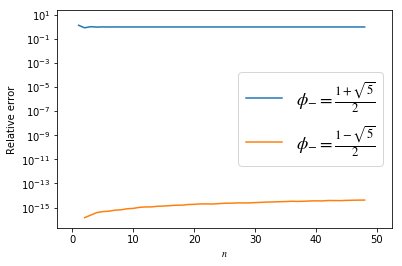

In [211]:
N = 51

ymas, ymenos = np.empty(N), np.empty(N)
err_mas, err_menos = np.empty(N), np.empty(N)

phi_mas = ((1 + np.sqrt(5))/2)
phi_menos = ((1 - np.sqrt(5))/2)

ymas[50], ymenos[50] = 1, phi_menos
ymas[49], ymenos[49] = phi_mas, 1

err_mas[50], err_menos[50] = 0, 0
err_mas[49], err_menos[49] = 0, 0

for n in reversed(range(N-1)):
    ymenos[n-1] = -ymenos[n] + ymenos[n+1]
    ymas[n-1] = -ymas[n] + ymas[n+1]

    
ymenos = [ymenos[i]/ymenos[0] for i in range(N)]
ymas = [ymas[i]/ymas[0] for i in range(N)]
nn = [i for i in range(N)]

for n in reversed(range(N-1)):
    err_menos[n-1] = np.abs(ymenos[n-1] - phi_menos**(n-1))/np.abs(phi_menos**(n-1))
    err_mas[n-1] = np.abs(ymas[n-1] - phi_mas**(n-1))/np.abs(phi_mas**(n-1))


    
plt.figure(1)
plt.semilogy(nn,err_mas, label=r'$\phi_{-} = \frac{1 + \sqrt{5}}{2}$')
plt.semilogy(nn,err_menos, label=r'$\phi_{-} = \frac{1 - \sqrt{5}}{2}$')
plt.xlabel(r'$n$')
plt.ylabel('Relative error')
plt.xticks()
plt.yticks()
plt.legend(fontsize=18)
plt.show()